In [1]:
import os, sys
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import easyocr
from pdf2image import convert_from_path
from IPython.display import display
import numpy as np
from PIL import ImageDraw

In [2]:
reader = easyocr.Reader(['de'], gpu=False)

Using CPU. Note: This module is much faster with a GPU.
/Users/eminasljivic/opt/miniconda3/envs/leoenv/lib/python3.10/site-packages/torchvision/models/_utils.py:252: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  warnings.warn(
/Users/eminasljivic/opt/miniconda3/envs/leoenv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/Users/eminasljivic/opt/miniconda3/envs/leoenv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [3]:
train_dir = r'input/train'
test_dir = r'input/test'

In [4]:
os.listdir(train_dir)

['Invoice_INV28924.pdf',
 'Invoice_INV22366.pdf',
 'Invoice_INV28922.pdf',
 'Invoice_INV19929.pdf',
 'Invoice_INV22481.pdf',
 'Invoice_INV22331.pdf',
 'Invoice_INV22332.pdf',
 'Invoice_INV22236.pdf']

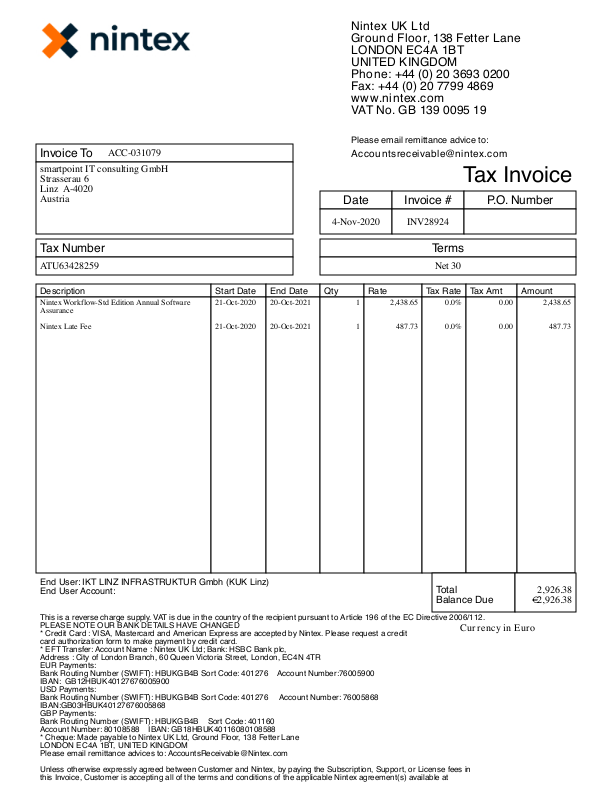

In [26]:
images = convert_from_path('input/train/'+os.listdir(train_dir)[0], size=(612, 792), dpi=300, transparent=True, single_file=True, fmt='png', output_folder=train_dir)
display(images[0])

In [18]:
bounds = reader.readtext(np.array(images[0]))

In [7]:
def draw_boxes(image, bounds):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0,*p1,*p2,*p3,*p0], fill = 'red', width = 2)
    return image

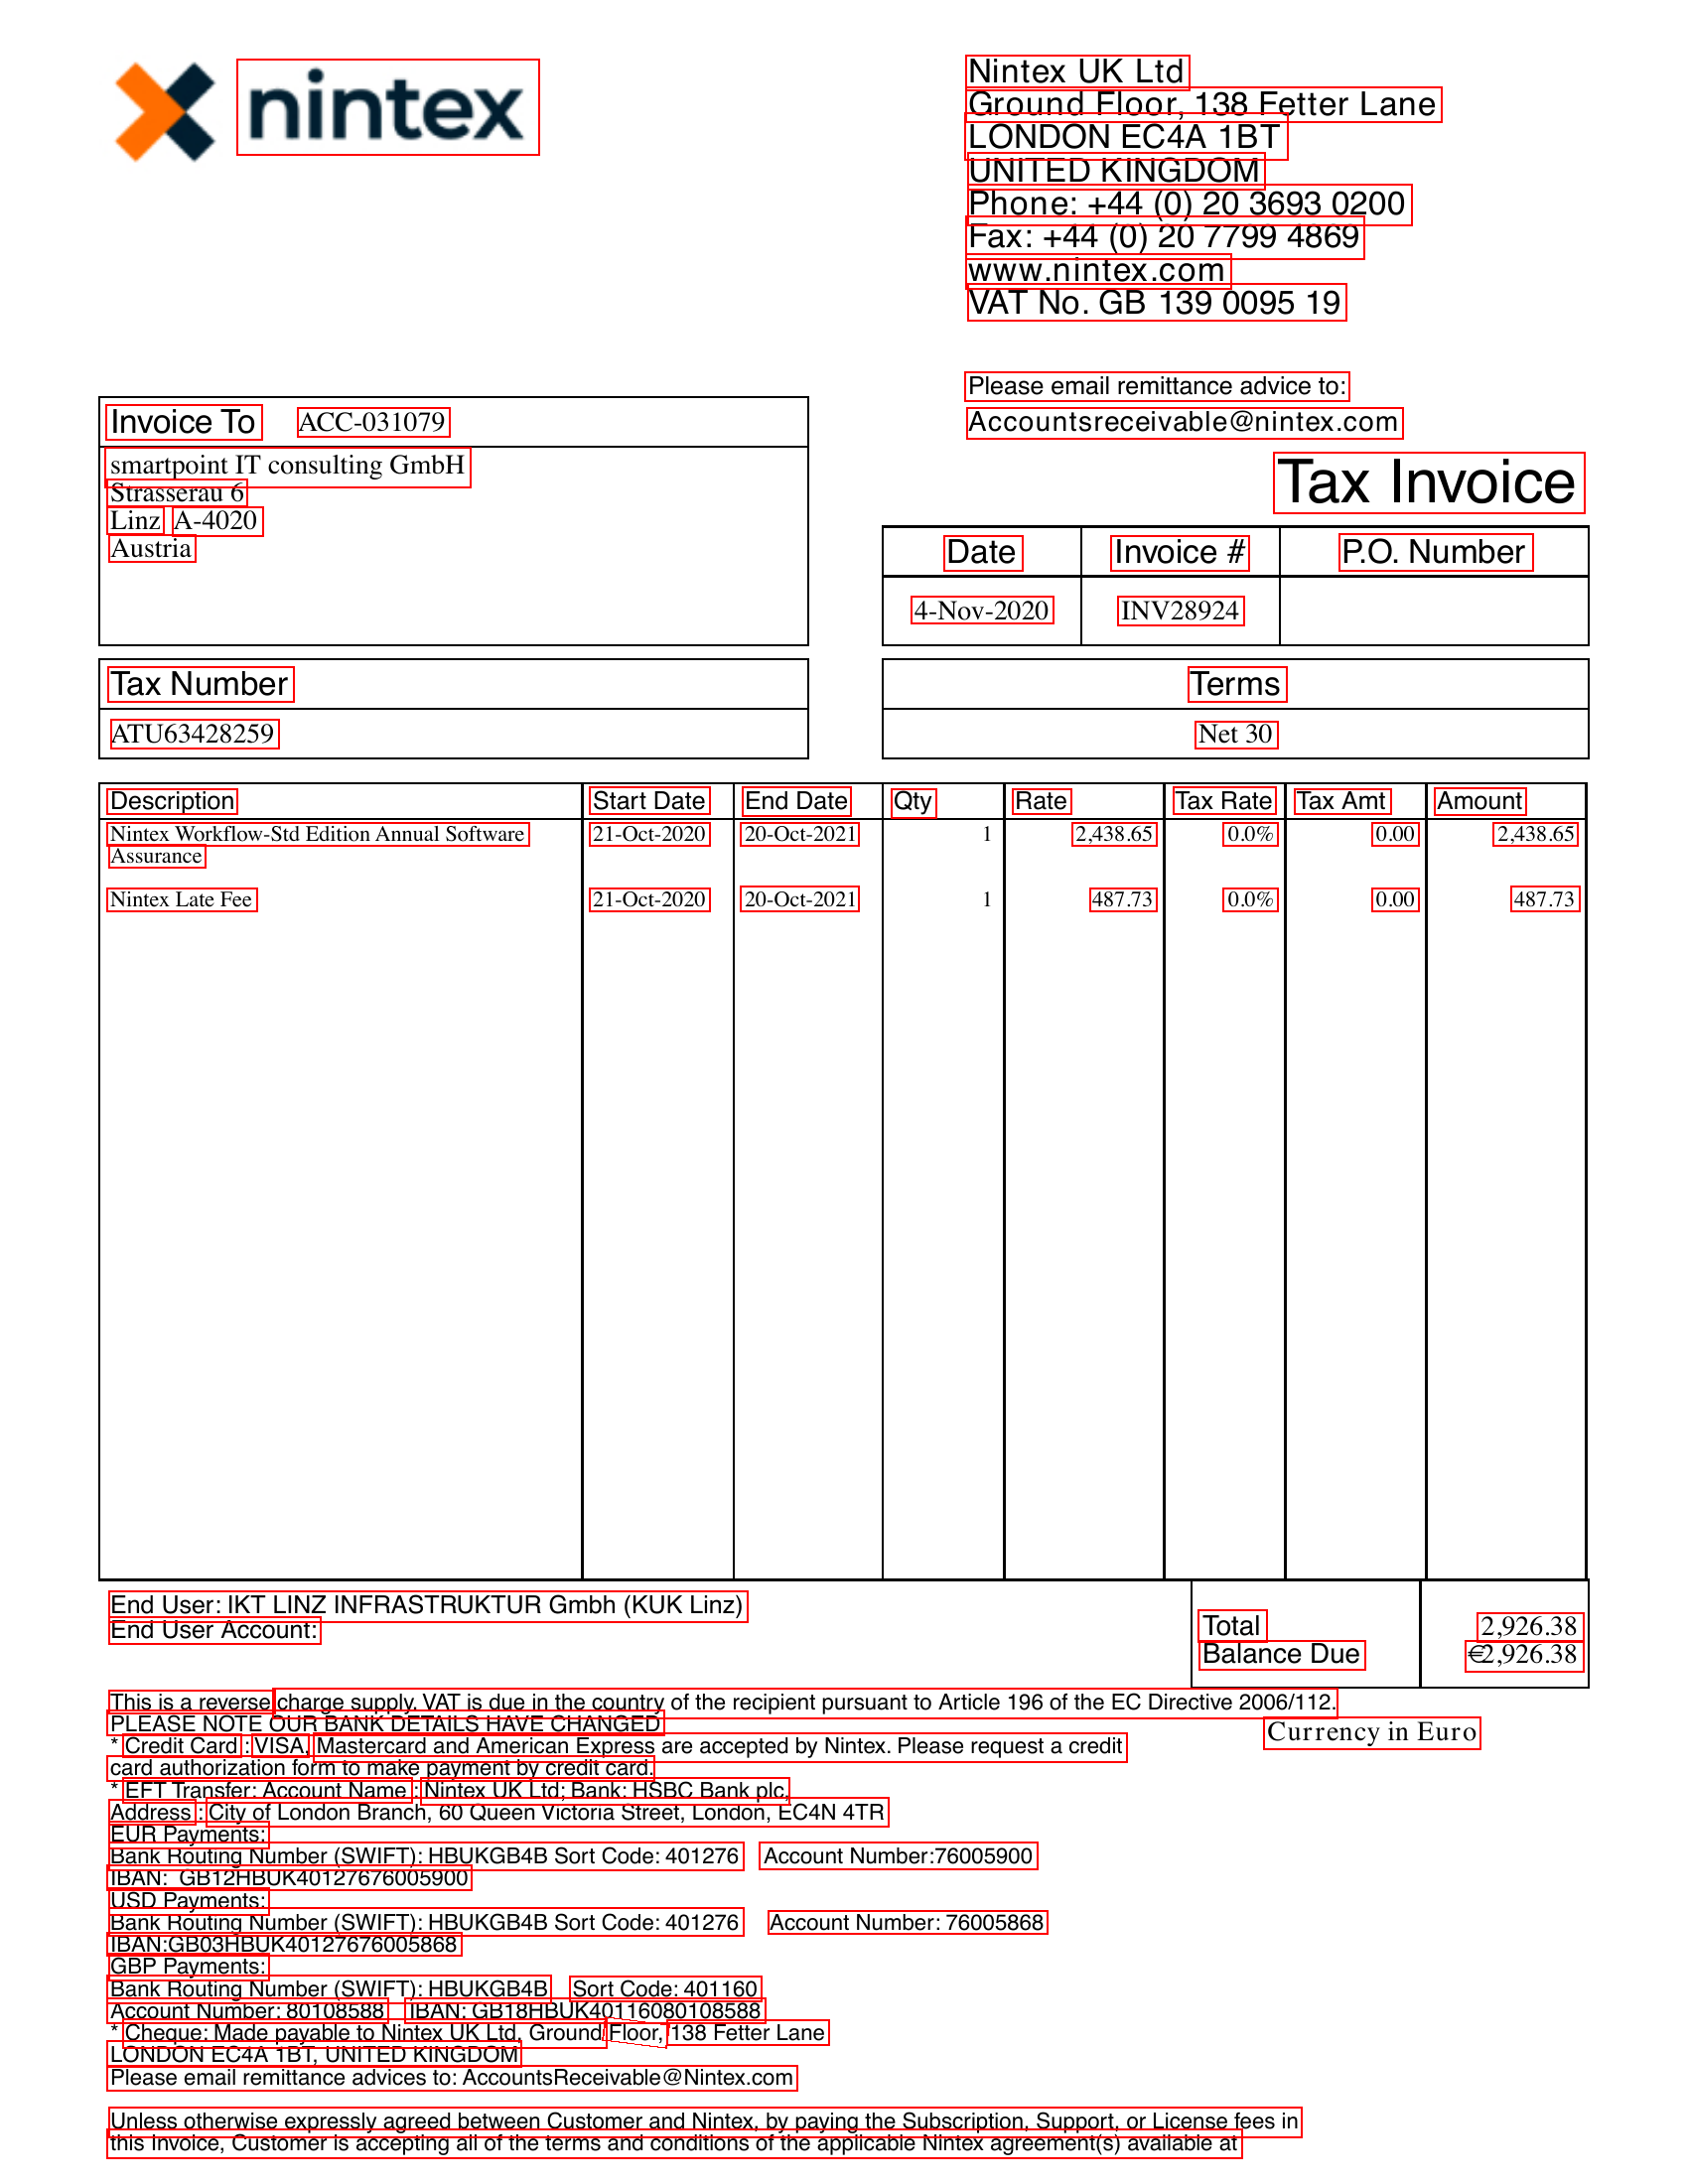

In [8]:
draw_boxes(images[0], bounds)

In [9]:
bounds

[([[973, 55], [1197, 55], [1197, 91], [973, 91]],
  'Nintex UK Ltd',
  0.8093523643418248),
 ([[239, 59], [542, 59], [542, 156], [239, 156]],
  'nintex',
  0.9999935272857994),
 ([[973, 87], [1451, 87], [1451, 123], [973, 123]],
  'Ground Floor; 138 Fetter Lane',
  0.5566640856990852),
 ([[972, 113], [1296, 113], [1296, 161], [972, 161]],
  'LONDON EC4A 1BT',
  0.4880915311360788),
 ([[975, 153], [1273, 153], [1273, 191], [975, 191]],
  'UNITED KINGDOM',
  0.921613291648356),
 ([[975, 185], [1421, 185], [1421, 227], [975, 227]],
  'Phone: +44 (0) 20 3693 0200',
  0.9741870186719994),
 ([[973, 217], [1373, 217], [1373, 261], [973, 261]],
  'Fax: +44 (0) 20 7799 4869',
  0.635364508944568),
 ([[973, 255], [1239, 255], [1239, 291], [973, 291]],
  'wwwnintex.com',
  0.9752095750286633),
 ([[975, 285], [1355, 285], [1355, 323], [975, 323]],
  'VAT No. GB 139 0095 19',
  0.8426911683335759),
 ([[972, 374], [1358, 374], [1358, 404], [972, 404]],
  'Please email remittance advice to:',
  0.886